# Machine Learning - Assignment 3

Arne Huckemann (ahuckema), Elise Wolf (eliwolf)

In [13]:
import numpy as np
from numpy.linalg import svd, matrix_rank
import pandas as pd
import matplotlib.pyplot as plt
from IPython import get_ipython
from util import (
    svdcomp,
    nextplot,
    plot_matrix,
    plot_xy,
    plot_cov,
    match_categories,
)  # see util.py
from sklearn.cluster import KMeans

# setup plotting
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
inJupyterLab = any(filter(lambda x: x.endswith("jupyter-lab"), psutil.Process().parent().cmdline()))
if not inJupyterLab:
    from IPython import get_ipython
    get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")

# 1 Intuition on SVD

In [14]:
M1 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
)

M2 = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 0, 0, 0, 0],
    ]
)

M3 = np.array([[0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1]])

M4 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
    ]
)

M5 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1],
    ]
)

M6 = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
    ]
)

## 1b

In [15]:
U1, s1, V1 = np.linalg.svd(M1)
U2, s2, V2 = np.linalg.svd(M2)
U3, s3, V3 = np.linalg.svd(M3)
U4, s4, V4 = np.linalg.svd(M4)
U5, s5, V5 = np.linalg.svd(M5)
U6, s6, V6 = np.linalg.svd(M6)

# Create diagonal matrices for each si
S1 = np.diag(s1)
S2 = np.diag(s2)
S3 = np.diag(s3)
S4 = np.diag(s4)
S5 = np.diag(s5)
S6 = np.diag(s6)

# Print the results
print("SVD of M1:")
print("U1:", U1)
print("S1:", S1)
print("V1:", V1.T) # here we have to transpose again, since numpy gives V^T

print("\nSVD of M2:")
print("U2:", U2)
print("S2:", S2)
print("V2:", V2.T)

print("\nSVD of M3:")
print("U3:", U3)
print("S3:", S3)
print("V3:", V3.T)

print("\nSVD of M4:")
print("U4:", U4)
print("S4:", S4)
print("V4:", V4.T)

print("\nSVD of M5:")
print("U5:", U5)
print("S5:", S5)
print("V5:", V5.T)

print("\nSVD of M6:")
print("U6:", U6)
print("S6:", S6)
print("V6:", V6.T)

SVD of M1:
U1: [[-5.77350269e-01  8.16496581e-01 -8.75605293e-17  0.00000000e+00
   0.00000000e+00]
 [-5.77350269e-01 -4.08248290e-01 -7.07106781e-01  0.00000000e+00
   0.00000000e+00]
 [-5.77350269e-01 -4.08248290e-01  7.07106781e-01  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]]
S1: [[3.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.33801123e-16 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.31940794e-49 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
V1: [[-0.57735027  0.81649658 -0.          0.          0.        ]
 [-0.57735027 -0.40824829  0.70710678  0.          0.        ]
 [-0.57735027 -0.4082482

## 1c

Text(0.5, 1.0, 'Rank-1 Approximation of M6')

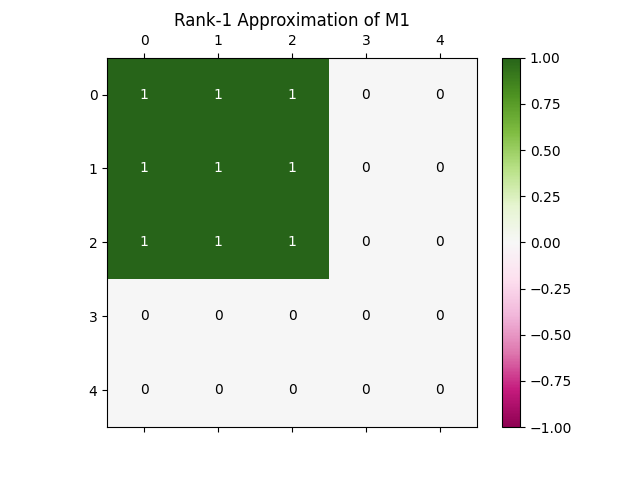

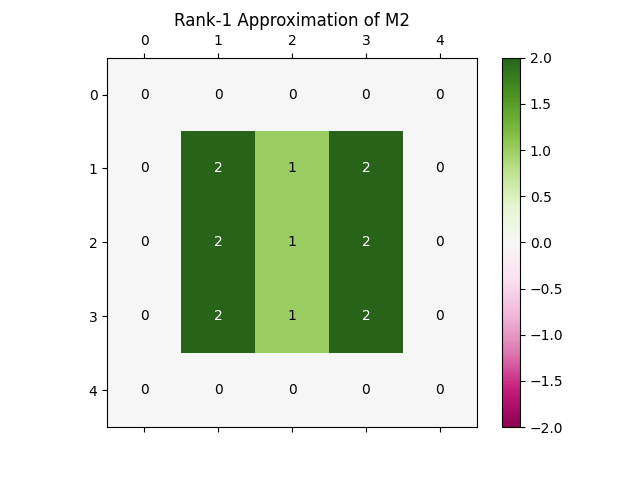

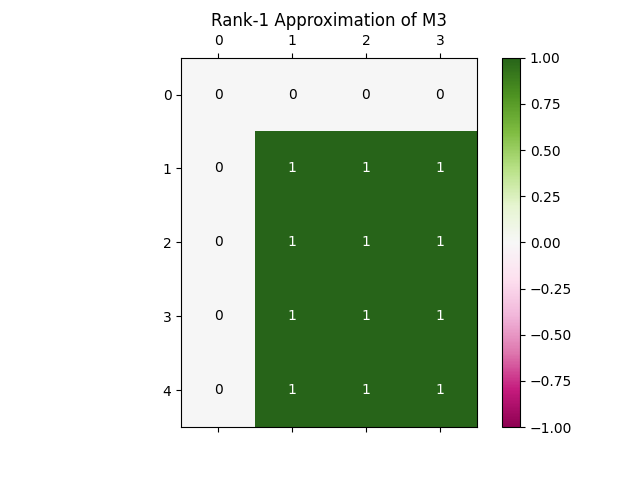

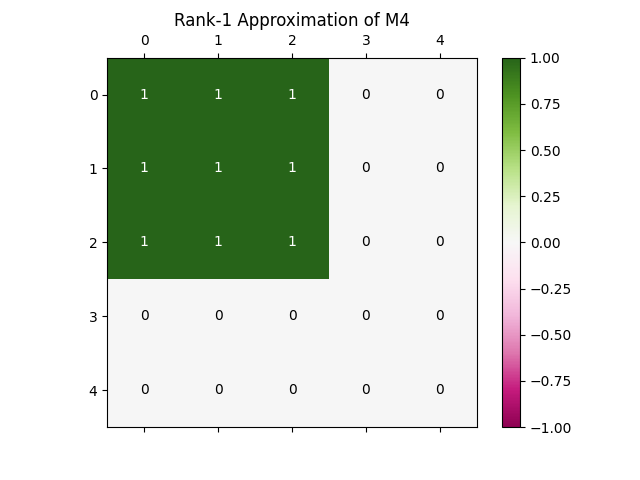

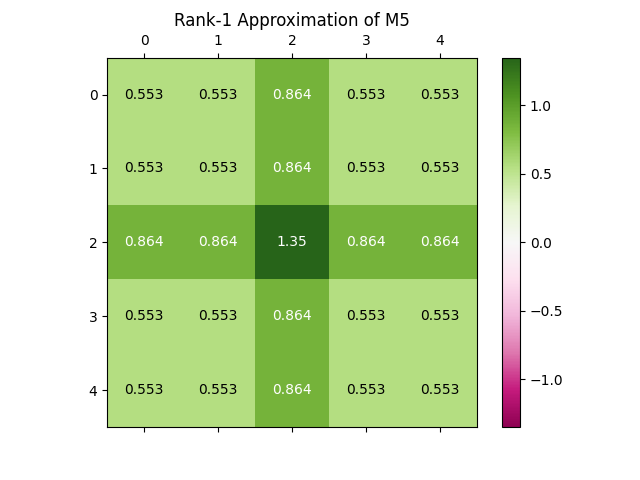

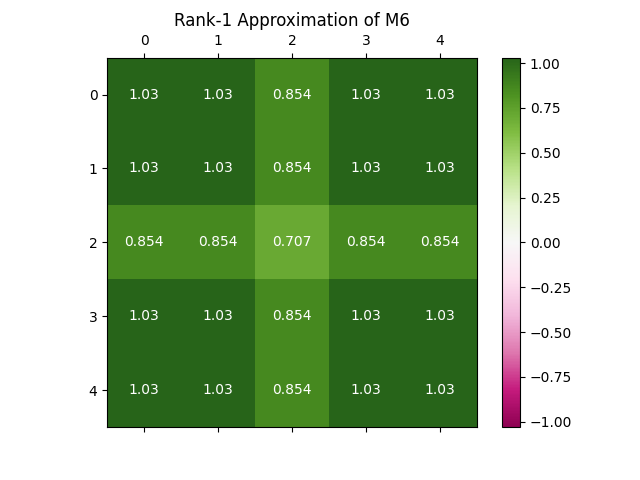

In [25]:
# You can use the functions svdcomp and plot_matrix from util.py
X1_1 = svdcomp(M1, range(1))
X1_2 = svdcomp(M2, range(1))
X1_3 = svdcomp(M3, range(1))
X1_4 = svdcomp(M4, range(1))
X1_5 = svdcomp(M5, range(1))
X1_6 = svdcomp(M6, range(1))

plot_matrix(X1_1)
plt.title("Rank-1 Approximation of M1")
plot_matrix(X1_2)
plt.title("Rank-1 Approximation of M2")
plot_matrix(X1_3)
plt.title("Rank-1 Approximation of M3")
plot_matrix(X1_4)
plt.title("Rank-1 Approximation of M4")
plot_matrix(X1_5)
plt.title("Rank-1 Approximation of M5")
plot_matrix(X1_6)
plt.title("Rank-1 Approximation of M6")

The best rank-1 approximation of a matrix is obtained by keeping only the largest singular value and its corresponding singular vectors in the SVD decomposition. For the given matrices, the rank-1 approximations are as follows:

- **M1**: The best rank-1 approximation is a matrix where all non-zero elements are equal to 1. This is intuitive as M1 has a clear block of ones. The SVD shows that the largest singular value is 3, which corresponds to the sum of the repeated rows. The left singular vectors (U1) and right singular vectors (V1) reflect this uniform structure, with the first singular vector being a scaled version of the original rows and columns. The rank-1 approximation captures the dominant pattern of the repeated rows with values [1, 1, 1, 0, 0] by focusing on the largest singular value and its corresponding singular vectors.

- **M2**: The best rank-1 approximation captures the dominant pattern of the repeated rows with values [0, 2, 1, 2, 0]. This is also intuitive as it reflects the structure of M2. The largest singular value is approximately 5.2, indicating the strength of this pattern. A larger singular value means that the corresponding pattern (captured by this specific singular vector) has a stronger presence in the matrix, e.g. occures often, in our case three times since it appeats in three rows. A smaller singular value means that the corresponding pattern has a weaker presence in the matrix.The left singular vectors (U2) and right singular vectors (V2) show that the dominant structure is captured by the first singular vector, which aligns with the repeated rows. The rank-1 approximation captures the dominant pattern of the repeated rows with values [0, 2, 1, 2, 0].

- **M3**: The best rank-1 approximation captures the repeated rows with values [0, 1, 1, 1]. This is intuitive as it reflects the structure of M3. The matrix ( M3 ) has a clear pattern where each row is ([0, 1, 1, 1]). This uniform structure suggests that the dominant pattern is the repeated row. It is intuitive because the repeated rows indicate a strong, consistent pattern that can be effectively captured by the rank-1 approximation. The largest singular value is approximately 3.46, representing the occurence of this repeated pattern four times in the four rows. The left singular vectors (U3) and right singular vectors (V3) indicate that the first singular vector captures the main structure of the matrix, with the other singular values being zero. The rank-1 approximation captures the dominant pattern of the repeated rows with values [0, 1, 1, 1].

- **M4**: The best rank-1 approximation captures the dominant pattern of the first block ([1, 1, 1, 0, 0]) because it is the most significant structure in the matrix due to its large singular value $\sigma_1$ compared to the other singular value. The second block ([0, 0, 0, 1, 1]) is not captured in the rank-1 approximation because it is less significant compared to the first block based on its singular value. The largest singular value is 3, corresponding to the dominant block of ones. The left singular vectors (U4) and right singular vectors (V4) show that the first singular vector captures the main block structure, with the other singular values being much smaller. The rank-1 approximation captures the dominant pattern of the repeated rows with values [1, 1, 1, 0, 0] and [0, 0, 0, 1, 1].

- **M5**: The best rank-1 approximation captures the dominant pattern of the repeated rows with values [1, 1, 1, 0, 0] and [0, 0, 1, 1, 1] since both rows occure two times. . This is intuitive as it reflects the structure of M5. The largest singular value is approximately 3.56, indicating the strength of this pattern. The left singular vectors (U5) and right singular vectors (V5) show that the first singular vector captures the main structure, with the other singular values being smaller. The rank-1 approximation captures the dominant pattern of the repeated rows with values [1, 1, 1, 0, 0] and [0, 0, 1, 1, 1].

- **M6**: The best rank-1 approximation captures the dominant pattern of the repeated rows with values [1, 1, 1, 1, 1]. This is intuitive as it reflects the structure of M6. The largest singular value is approximately 4.83, representing the repeated pattern. The left singular vectors (U6) and right singular vectors (V6) indicate that the first singular vector captures the main structure of the matrix, with the other singular values being much smaller. The rank-1 approximation captures the dominant pattern of the repeated rows with values [1, 1, 1, 1, 1].

In summary, the best rank-1 approximations are intuitive as they capture the dominant patterns and structures present in the original matrices. The SVD decomposition provides a clear representation of these patterns through the singular values and singular vectors.

In [26]:
# Count the number of non-zero singular values
non_zero_singular_values_M6 = np.sum(s6 > 1e-10)
print(f"Number of non-zero singular values for M6: {non_zero_singular_values_M6}")

Number of non-zero singular values for M6: 2


## 1d

In [17]:
# Another method to compute the rank is matrix_rank.
# YOUR PART

# 2 The SVD on Weather Data

In [18]:
# Load the data
climate = pd.read_csv("data/worldclim.csv")
coord = pd.read_csv("data/worldclim_coordinates.csv")
lon = coord["lon"]
lat = coord["lat"]

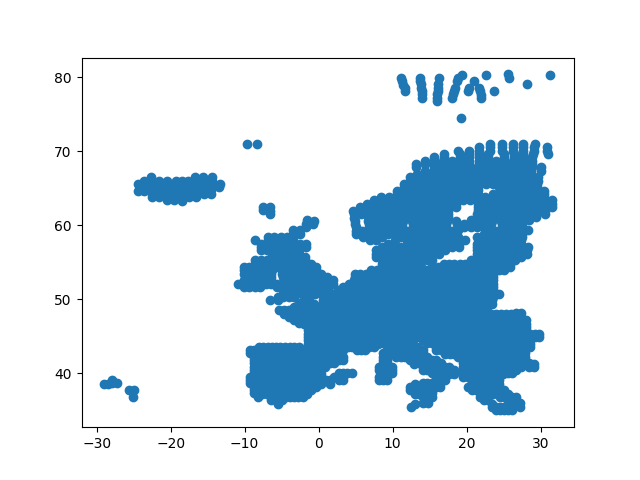

In [19]:
# Plot the coordinates
plot_xy(lon, lat)

## 2a

In [20]:
# YOUR PART
# Normalize the data to z-scores. Store the result in X.

NameError: name 'X' is not defined

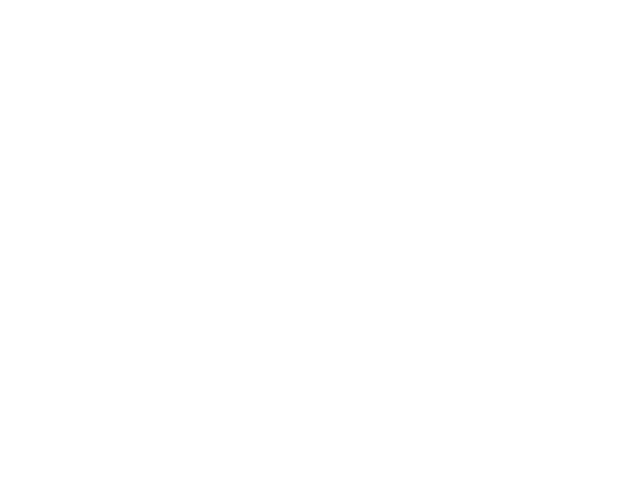

In [21]:
# Plot histograms of attributes
nextplot()
X.hist(ax=plt.gca())

## 2b

In [ ]:
# Compute the SVD of the normalized climate data and store it in variables U,s,Vt. What
# is the rank of the data?
# YOUR PART

## 2c

In [ ]:
# Here is an example plot.
plot_xy(lon, lat, U[:, 0])

In [ ]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART

## 2d

In [ ]:
# Here is an example.
plot_xy(U[:, 0], U[:, 1], lat - np.mean(lat))

## 2e

In [ ]:
# 2e(i) Guttman-Kaiser
# YOUR PART

In [ ]:
# 2e(ii) 90% squared Frobenius norm
# YOUR PART

In [ ]:
# 2e(iv) entropy
# YOUR PART

In [ ]:
# 2e(v) random flips
# Random sign matrix: np.random.choice([-1,1], X.shape)
# YOUR PART

## 2f

In [ ]:
# Here is the empty plot that you need to fill (one line per choice of k: RSME between
# original X and the reconstruction from size-k SVD of noisy versions)
# YOUR PART
nextplot()
plt.plot()
plt.xlabel(r"Noise level ($\epsilon$)")
plt.ylabel("Reconstruction RMSE vs. original data")

# 3 SVD and k-means

In [ ]:
# Cluster the normalized climate data into 5 clusters using k-means and store
# the vector giving the cluster labels for each location.
X_clusters = KMeans(5).fit(X).labels_

## 3a

In [ ]:
# Plot the results to the map: use the cluster labels to give the color to each
# point.
plot_xy(lon, lat, X_clusters)

## 3b

In [ ]:
# YOUR PART HERE

## 3c

In [ ]:
# Compute the PCA scores, store in Z (of shape N x k)
k = 2
# YOUR PART HERE

In [ ]:
# cluster and visualize
Z_clusters = KMeans(5).fit(Z).labels_
# match clusters as well as possible (try without)
Z_clusters = match_categories(X_clusters, Z_clusters)
nextplot()
axs = plt.gcf().subplots(1, 2)
plot_xy(lon, lat, X_clusters, axis=axs[0])
axs[0].set_title("Original data")
plot_xy(lon, lat, Z_clusters, axis=axs[1])
axs[1].set_title(f"PCA $(k={k}$)")